In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
np.random.seed(1)
tf.set_random_seed(1)

In [3]:
mnist = input_data.read_data_sets('data/', one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
n_crops = np.random.randint(1, 5)
n_crops

2

(array([9, 9]), array([[108, 156, 124, 190],
        [157, 130, 190, 163]]))

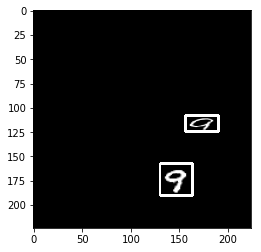

In [5]:
# use [y1, x1, y2, x2] as per original R-CNN trilogy
def make_crop(base):
    scale = np.random.uniform(0.5, 1.5, size=[2])
    w, h = (scale * 28).astype(np.int64)
    x = np.random.randint(base.shape[1] - w)
    y = np.random.randint(base.shape[0] - h)
    return y, x, y+h, x+w

def add_crop(base):
    crop, label = mnist.train.next_batch(1)
    crop = crop.reshape([28, 28])

    y1, x1, y2, x2 = make_crop(base)
    crop = cv2.resize(crop, (x2-x1, y2-y1))

    base[y1:y2, x1:x2] = crop
    return int(label), [y1, x1, y2, x2]

base = np.zeros([224, 224], np.float32)
gt_cls, gt_boxes = zip(*[add_crop(base) for i in range(n_crops)])
gt_cls, gt_boxes = map(np.array, (gt_cls, gt_boxes))

for y1, x1, y2, x2 in gt_boxes:
    cv2.rectangle(base, (x1, y1), (x2, y2), (1, 0, 0), 2)

plt.imshow(base, cmap='gray')
gt_cls, gt_boxes